In [1]:
from PIL import Image
import numpy as np
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
import matplotlib.pyplot as plt

from model.data_gen import ISBI2012

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


### dataset constructor

In [4]:
data = ISBI2012()

In [5]:
data.image_path, data.mask_path

(PosixPath('/Users/ilyarudyak/data/isbi2012/train-volume.tif'),
 PosixPath('/Users/ilyarudyak/data/isbi2012/train-labels.tif'))

In [6]:
len(data.training_set_pages)

24

In [7]:
data.image_data.shape, data.mask_data.shape

((30, 512, 512, 1), (30, 512, 512, 1))

In [8]:
img = data.image_data[0].reshape(512, 512)

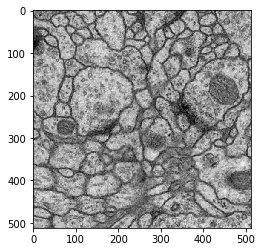

In [9]:
plt.imshow(img, cmap='gray');

In [10]:
mask = data.mask_data[0].reshape(512, 512)

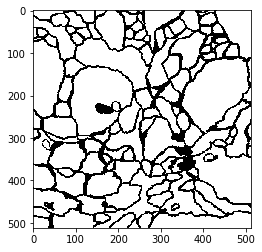

In [11]:
plt.imshow(mask, cmap='gray');

### generator

In [12]:
gen = data.generator()

In [13]:
img, mask = next(gen)

In [15]:
img.shape, mask.shape

((1, 512, 512, 1), (1, 512, 512, 1))

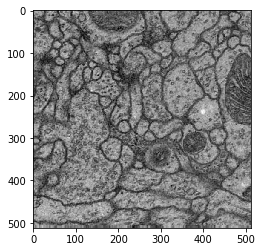

In [16]:
plt.imshow(img.reshape(512, 512), cmap='gray');

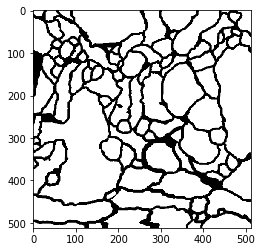

In [17]:
plt.imshow(mask.reshape(512, 512), cmap='gray');

In [19]:
# check if img is rescaled
img.reshape(512, 512)[:5, :5]

array([[0.59153557, 0.6216525 , 0.6532983 , 0.6329557 , 0.620977  ],
       [0.5915681 , 0.62172294, 0.6532658 , 0.6329394 , 0.62095535],
       [0.59285593, 0.6130977 , 0.6325797 , 0.62575585, 0.6383761 ],
       [0.5778911 , 0.58020145, 0.5876724 , 0.5985749 , 0.64957064],
       [0.58963686, 0.5527935 , 0.53168297, 0.53486866, 0.6157892 ]],
      dtype=float32)

### test generator

In [10]:
data = ISBI2012()

In [11]:
test_gen = data.test_generator()

In [12]:
data.image_data_test.shape

(30, 512, 512, 1)

Let's first check that we correctly loaded data.

In [13]:
test_img = data.image_data_test[0]

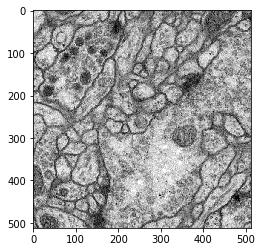

In [14]:
plt.imshow(test_img.reshape(512, 512), cmap='gray');

And now let's check the loader itself.

In [15]:
test_img = next(test_gen)

In [16]:
test_img.shape

(1, 512, 512, 1)

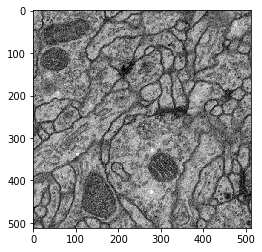

In [17]:
plt.imshow(test_img.reshape(512, 512), cmap='gray');

### augmentation

In [2]:
data = ISBI2012()

In [3]:
data.augmentation

{'preprocessing_function': <function utils.random_transforms(img_arr)>}

In [4]:
gen = data.generator()

In [5]:
img, mask = next(gen)

In [6]:
img.shape, mask.shape

((1, 512, 512, 1), (1, 512, 512, 1))

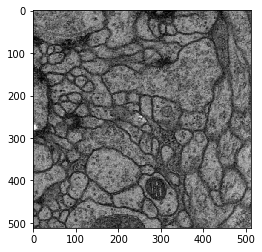

In [7]:
plt.imshow(img.reshape(512, 512), cmap='gray');

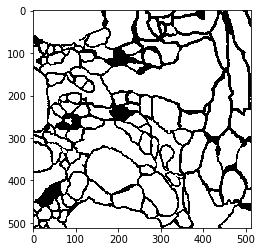

In [8]:
plt.imshow(mask.reshape(512, 512), cmap='gray');